# Project Title : Big Market selling price prediction
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. Item_Type
2. Outlet_Type
3. Outlet_Size
4. Outlet_Identifier
5. Outlet_Location_Type
6. Item_Identifier

## Ordinal
7. Item_Fat_Content

## DISCRETE: 
8. Outlet_Establishment_Year

## Continuous : 
9. Item_MRP
10. Item_Visibility
11. Item_Weight
12. Item_Outlet_Sales

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import r2_score

In [9]:
from sklearn.ensemble import RandomForestRegressor 

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
df=pd.read_csv("train.csv")

In [13]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

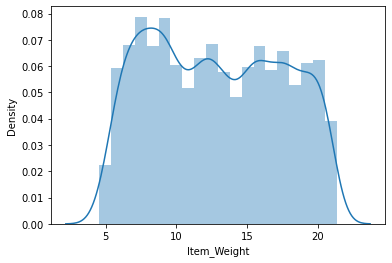

In [16]:
sns.distplot(df['Item_Weight'])

In [17]:
item_weight_mean=df['Item_Weight'].mean()


In [18]:
df['Item_Weight']=df['Item_Weight'].fillna(item_weight_mean)

In [19]:
mod_val=df['Outlet_Size'].mode()[0]


In [20]:
df['Outlet_Size']=df['Outlet_Size'].fillna(mod_val)

In [21]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

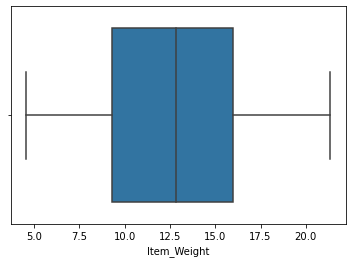

In [23]:
sns.boxplot(df['Item_Weight'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

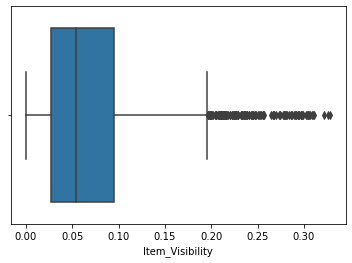

In [24]:
sns.boxplot(df['Item_Visibility'])

# Removing outlier using IQR

In [25]:
q3=df['Item_Visibility'].quantile(0.75)

In [26]:
q1=df['Item_Visibility'].quantile(0.25)

In [27]:
IQR=q3-q1

In [28]:
lower=q1-1.5*IQR

In [29]:
upper=q3+1.5*IQR

In [30]:
df=df[(df['Item_Visibility']>lower) & (df['Item_Visibility']<upper)]

In [31]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

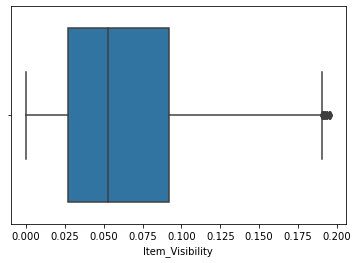

In [32]:
sns.boxplot(df['Item_Visibility'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

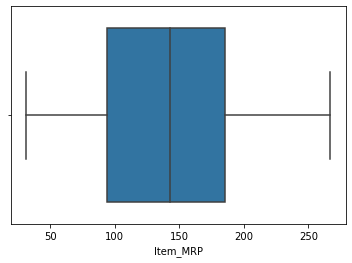

In [33]:
sns.boxplot(df['Item_MRP'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year'>

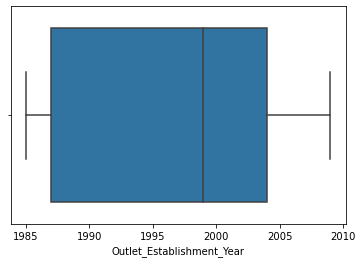

In [34]:
sns.boxplot(df['Outlet_Establishment_Year'])

In [35]:
Outlet_Type_df=df.groupby("Outlet_Type")


In [36]:
label_item=Outlet_Type_df['Item_Outlet_Sales'].sum().index

In [37]:
label_item_val=Outlet_Type_df['Item_Outlet_Sales'].sum().values

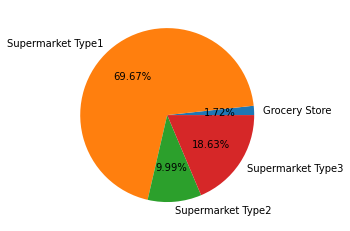

In [38]:
plt.pie(x=label_item_val,labels=label_item,autopct="%1.2f%%")
plt.show()

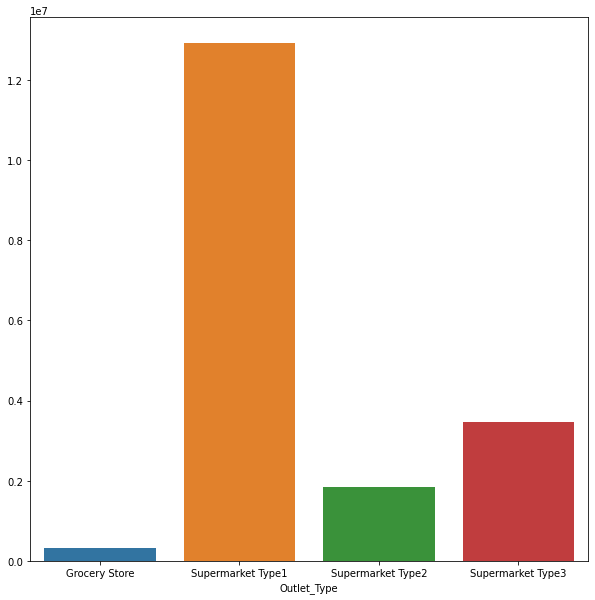

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(x=label_item,y=label_item_val)
plt.show()

# Observations:
1. Outlet Type : Supermarket Type 1 is maximum.
2. Outlet Type : Grocery Store is minimum.


In [40]:
Outlet_location_Type_df=df.groupby("Outlet_Location_Type")


In [41]:
label_location_item=Outlet_location_Type_df['Item_Outlet_Sales'].sum().index

In [42]:
label_location_item_val=Outlet_location_Type_df['Item_Outlet_Sales'].sum().values

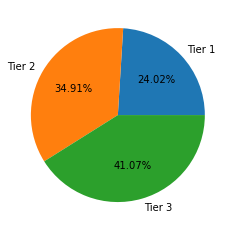

In [43]:
plt.pie(x=label_location_item_val,labels=label_location_item,autopct="%1.2f%%")
plt.show()

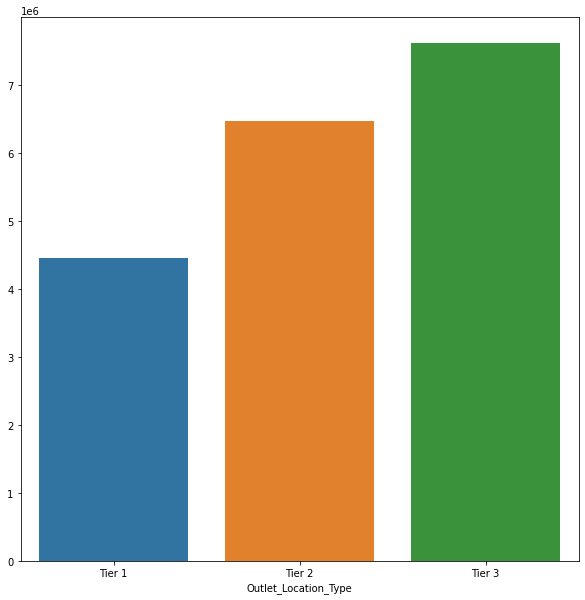

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(x=label_location_item,y=label_location_item_val)
plt.show()

# Observations:
1. In Tire 2 maximum number of outlets are present.
2. In Tire 1 minimum number of outlets are present.

In [45]:
Outlet_Size_Type_df=df.groupby("Outlet_Size")


In [46]:
label_outlet_size_location_item=Outlet_Size_Type_df['Item_Outlet_Sales'].sum().index

In [47]:
label_outlet_location_item_val=Outlet_Size_Type_df['Item_Outlet_Sales'].sum().values

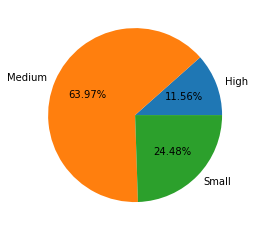

In [48]:
plt.pie(x=label_outlet_location_item_val,labels=label_outlet_size_location_item,autopct="%1.2f%%")
plt.show()

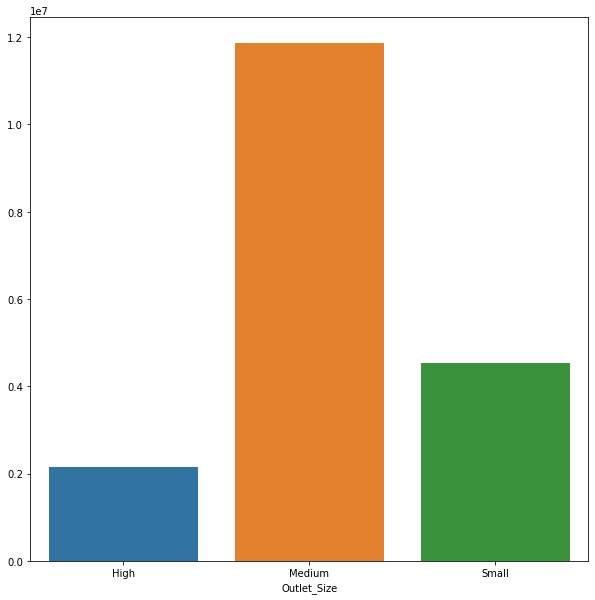

In [49]:
plt.figure(figsize=(10,10))
sns.barplot(x=label_outlet_size_location_item,y=label_outlet_location_item_val)
plt.show()

# Observations:
1. Maximum sales is in Medium outlet size
2. Minimum sales is in High outlet size

In [50]:
Item_Type_df=df.groupby("Item_Type")


In [51]:
label_Item_type=Item_Type_df['Item_Outlet_Sales'].sum().sort_values(ascending=False).index

In [52]:
label_Item_type_val=Item_Type_df['Item_Outlet_Sales'].sum().sort_values(ascending=False).values

In [53]:
label_Item_type

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Meat',
       'Soft Drinks', 'Breads', 'Hard Drinks', 'Starchy Foods', 'Others',
       'Breakfast', 'Seafood'],
      dtype='object', name='Item_Type')

In [54]:
label_Item_type_val

array([2812070.2168, 2727275.2604, 2049568.759 , 1821345.835 ,
       1518132.5254, 1439663.3348, 1260139.686 , 1044006.3584,
        915656.0976,  890331.7288,  552249.1416,  457336.0226,
        349275.351 ,  325259.945 ,  231134.4674,  148374.8616])

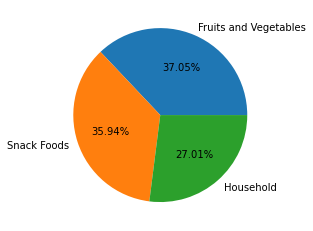

In [55]:
plt.pie(x=label_Item_type_val[:3],labels=label_Item_type[:3],autopct="%1.2f%%")
plt.show()

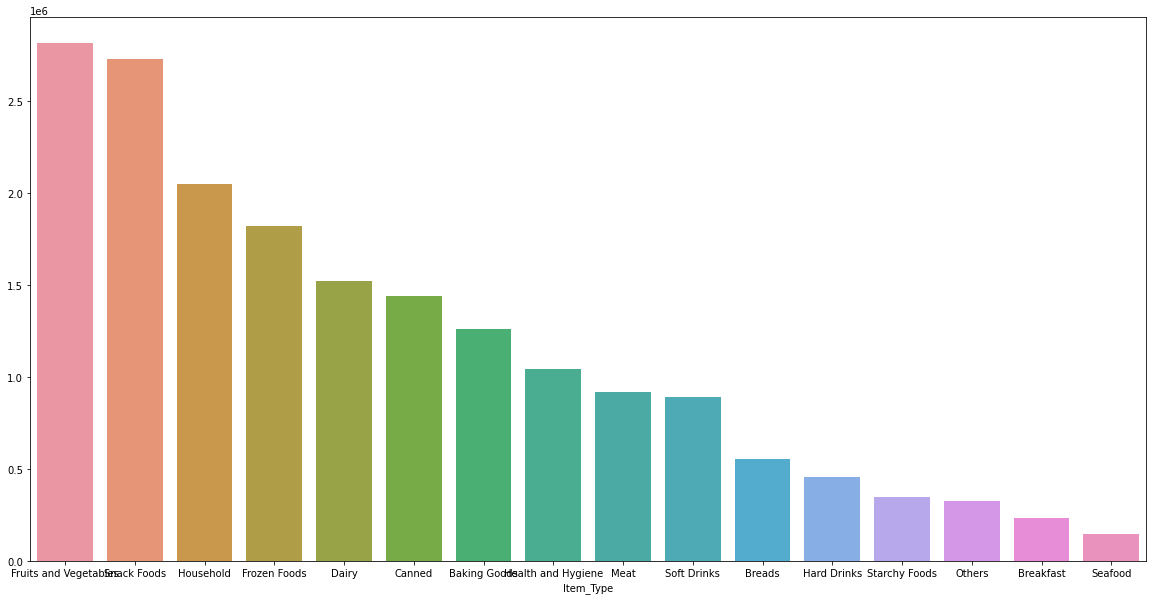

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(x=label_Item_type,y=label_Item_type_val)
plt.show()

# Observations:
1. Fruits and vegitables item type are puchased maximum.
2. Seafood item type are purchased minimum.

In [57]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

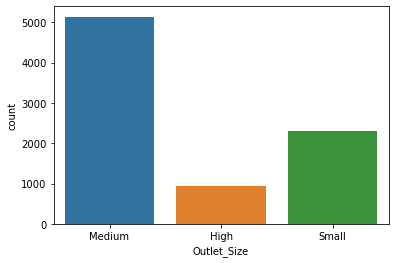

In [58]:
sns.countplot(df['Outlet_Size'])

# Observations:
1. Medium size outlets are maximum in number.
2. High size outlets are minimum in number.

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

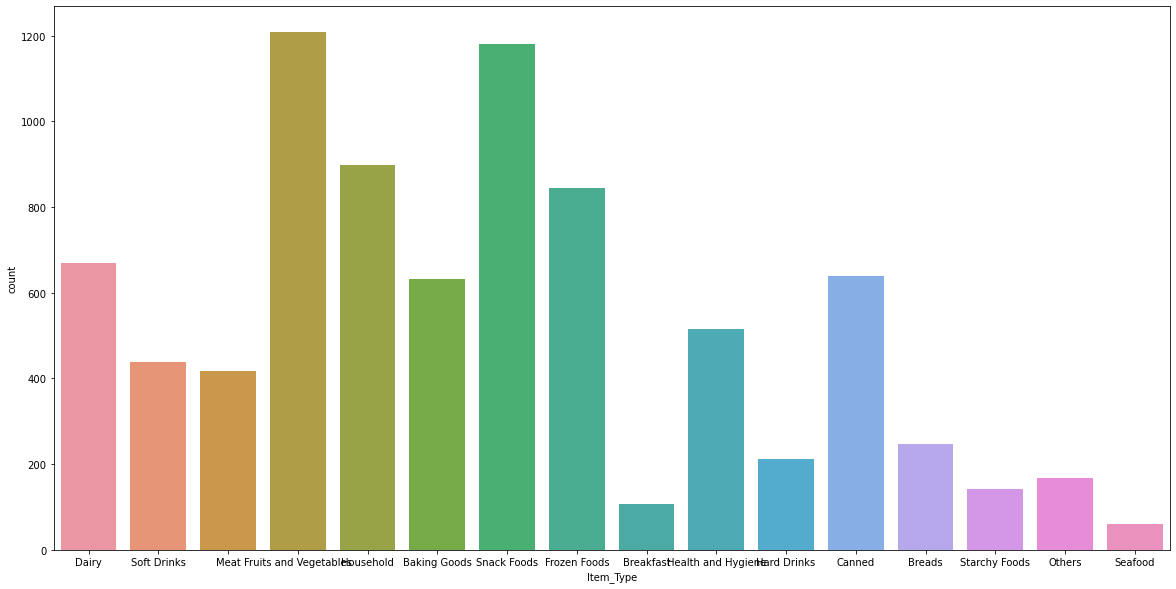

In [59]:
plt.figure(figsize=(20,10))
sns.countplot(df['Item_Type'])

# Observations:
1. Fruits and vegitables item type are puchased maximum.
2. Seafood item type are purchased minimum.

In [60]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

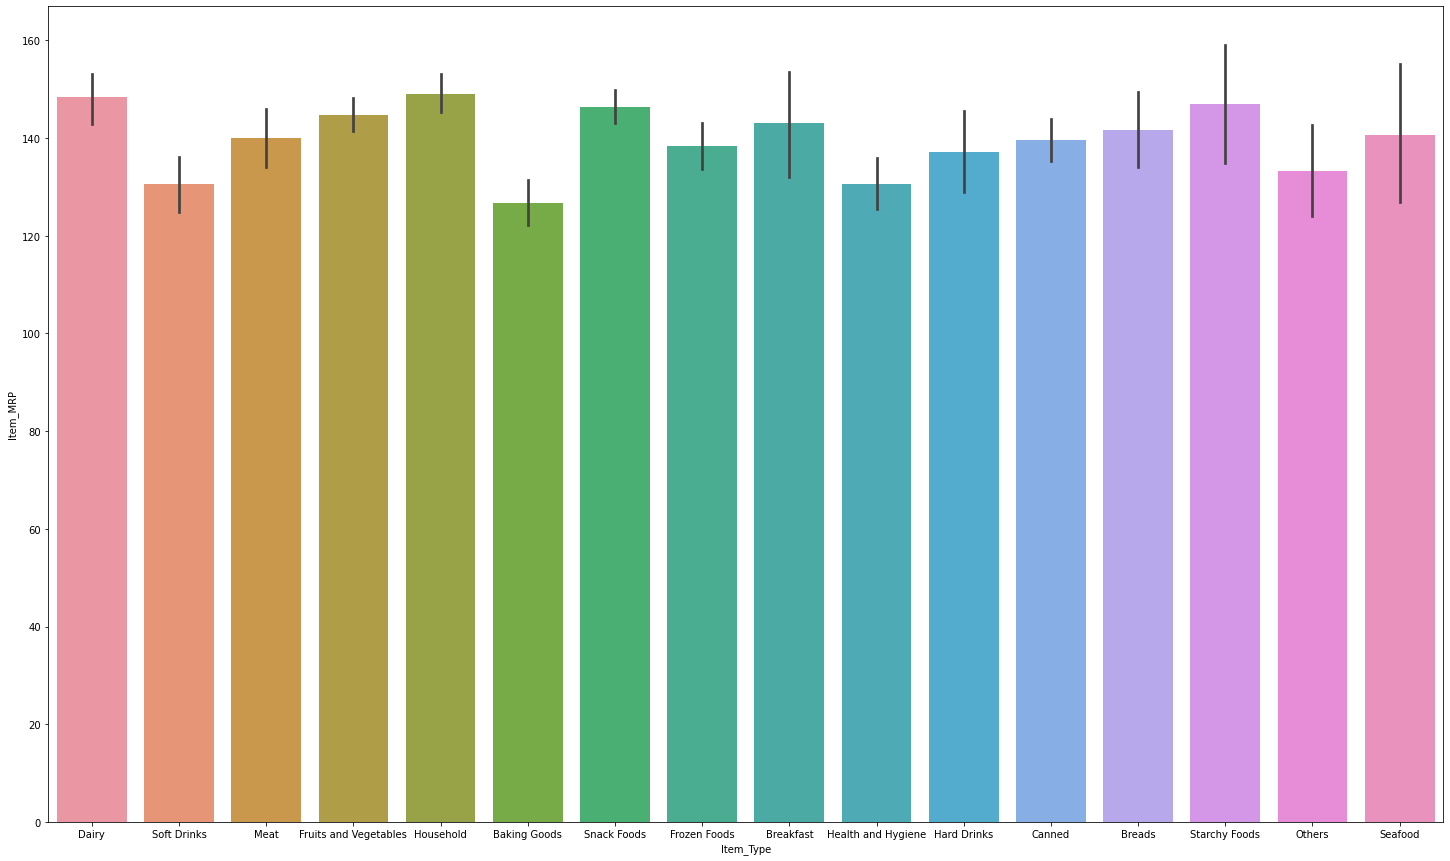

In [61]:
plt.figure(figsize=(25,15))
sns.barplot(x='Item_Type',y='Item_MRP',data=df)

# Observations:
1. Starchy Foods have maximum MRP
2. Banking Goods have minimum MRP

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

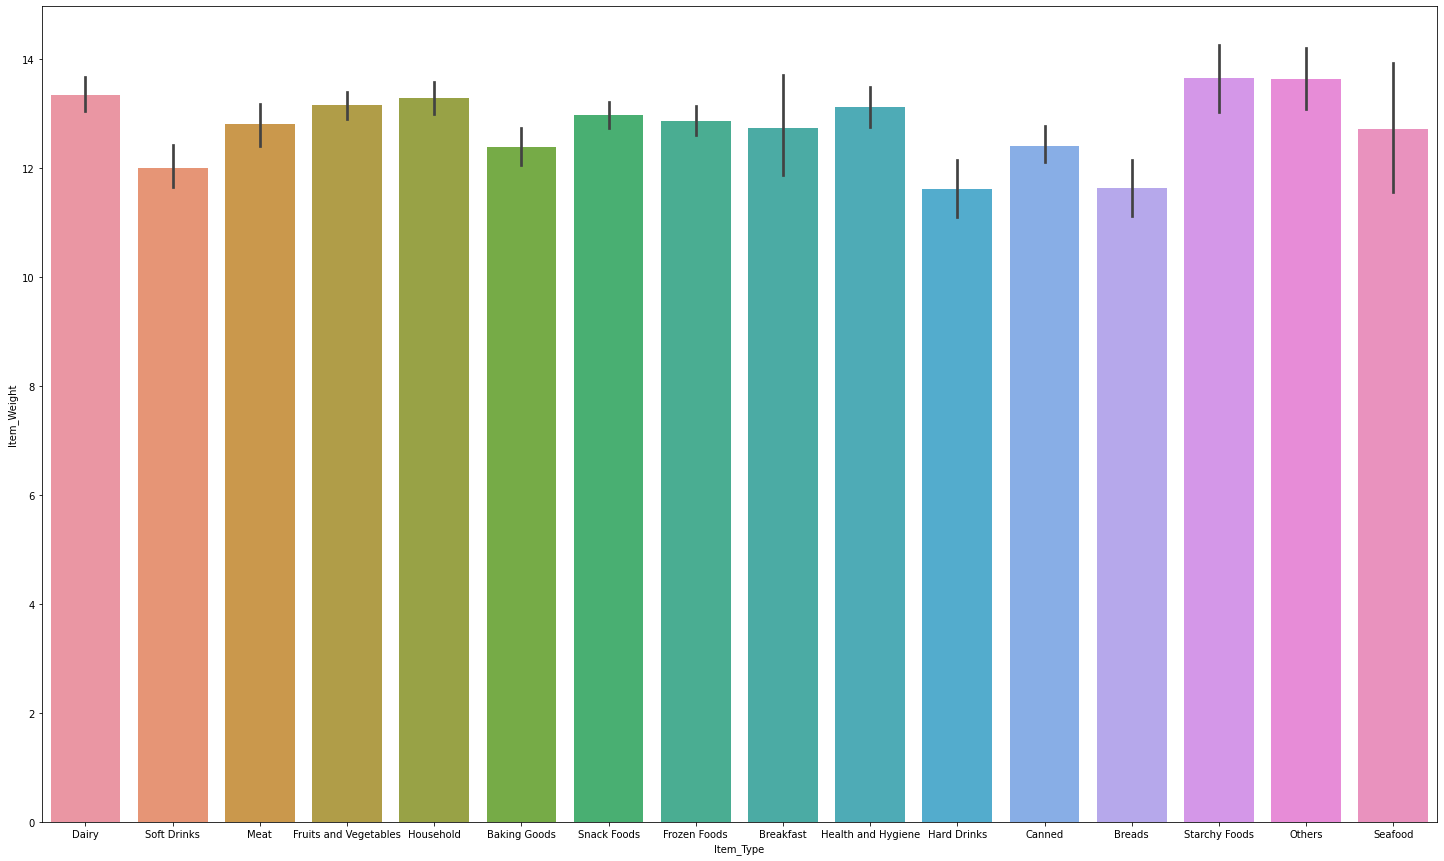

In [62]:
plt.figure(figsize=(25,15))
sns.barplot(x='Item_Type',y='Item_Weight',data=df)

# Observations:
1. Starchy Foods and Others item type have maximum weight
2. Hard Drinks item type have minimum weight

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

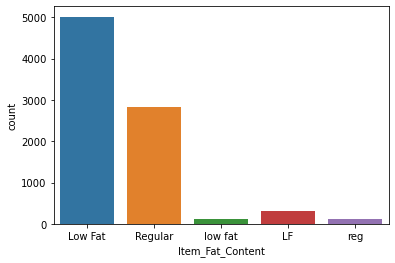

In [63]:
sns.countplot(df['Item_Fat_Content'])

# Observations:
1. Low Fat products are maximum as compared to other different fat products

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

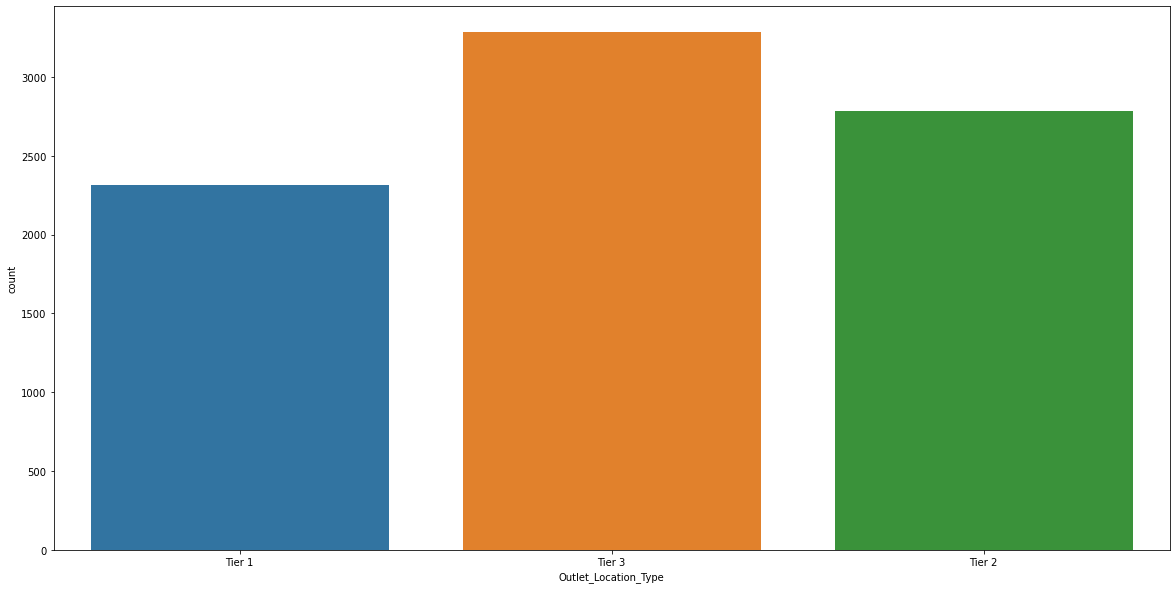

In [64]:
plt.figure(figsize=(20,10))
sns.countplot(df['Outlet_Location_Type'])

# Observations:
1. Maximum outlets are in Tire 3 location 
2. Minimum outlets are in Tire 1 location

In [65]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:>

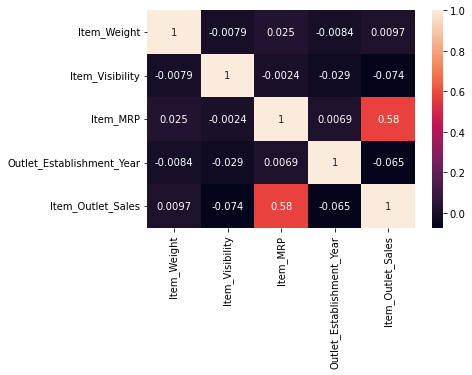

In [66]:
sns.heatmap(df.corr(),annot=True)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

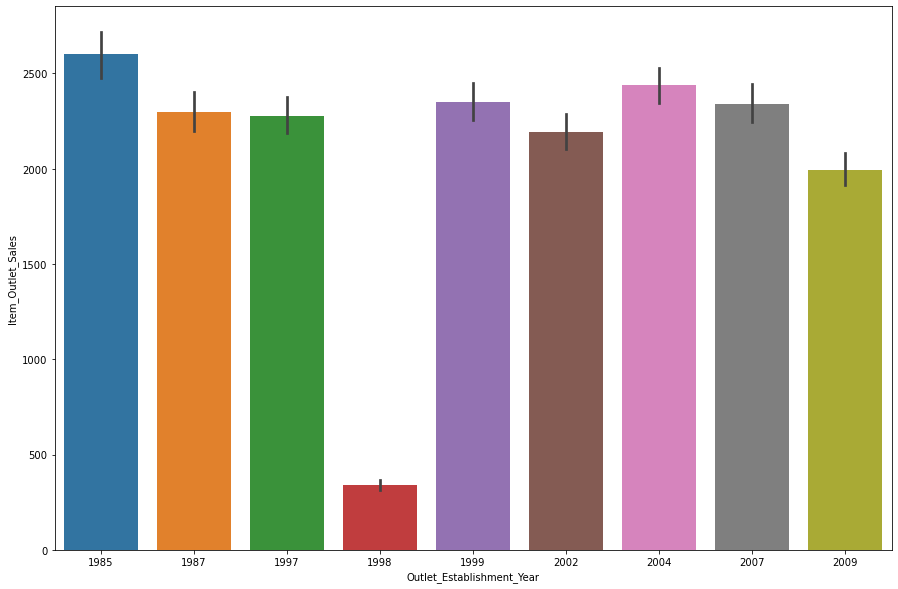

In [67]:
plt.figure(figsize=(15,10))
sns.barplot(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])

# Observations:
1. Outlet established in the year 1985 has maximum sales
2. Outlet established in the year 1998 has minimum sales


In [68]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

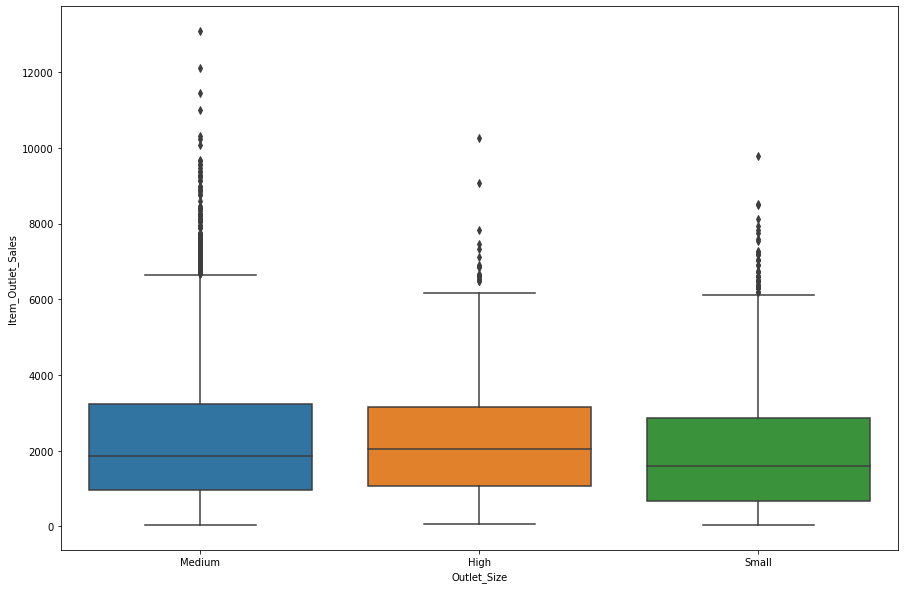

In [69]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

In [70]:
q1=df.groupby("Outlet_Size")['Item_Outlet_Sales'].quantile(0.25)


In [71]:
q1

Outlet_Size
High      1072.6038
Medium     958.7520
Small      676.1199
Name: Item_Outlet_Sales, dtype: float64

In [72]:
q3=df.groupby("Outlet_Size")['Item_Outlet_Sales'].quantile(0.75)


In [73]:
IQR=q3-q1

In [74]:
lower=q1-1.5*IQR

In [75]:
higher=q3+1.5*IQR

In [76]:
lower

Outlet_Size
High     -2068.058025
Medium   -2456.802000
Small    -2617.093350
Name: Item_Outlet_Sales, dtype: float64

In [77]:
higher

Outlet_Size
High      6307.040175
Medium    6651.342000
Small     6164.808650
Name: Item_Outlet_Sales, dtype: float64

In [78]:
medium_df=df[(df['Outlet_Size']=="Medium") & (df['Item_Outlet_Sales']>-2456.802000) & (df['Item_Outlet_Sales']<6651.342000)]

In [79]:
High_df=df[(df['Outlet_Size']=="High") & (df['Item_Outlet_Sales']>-2068.058025) & (df['Item_Outlet_Sales']<6307.040175)]

In [80]:
small_df=df[(df['Outlet_Size']=="Small") & (df['Item_Outlet_Sales']>-2617.093350) & (df['Item_Outlet_Sales']<6164.808650)]

In [81]:
df=pd.concat([medium_df,High_df,small_df],axis=0)

In [82]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8507,FDN28,5.880,Regular,0.030242,Frozen Foods,101.7990,OUT035,2004,Small,Tier 2,Supermarket Type1,515.9950
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

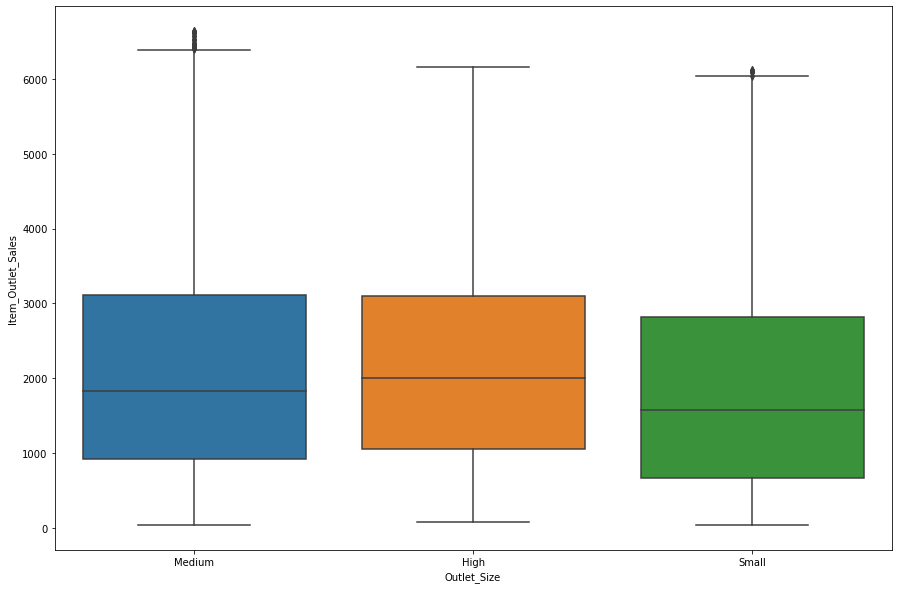

In [83]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

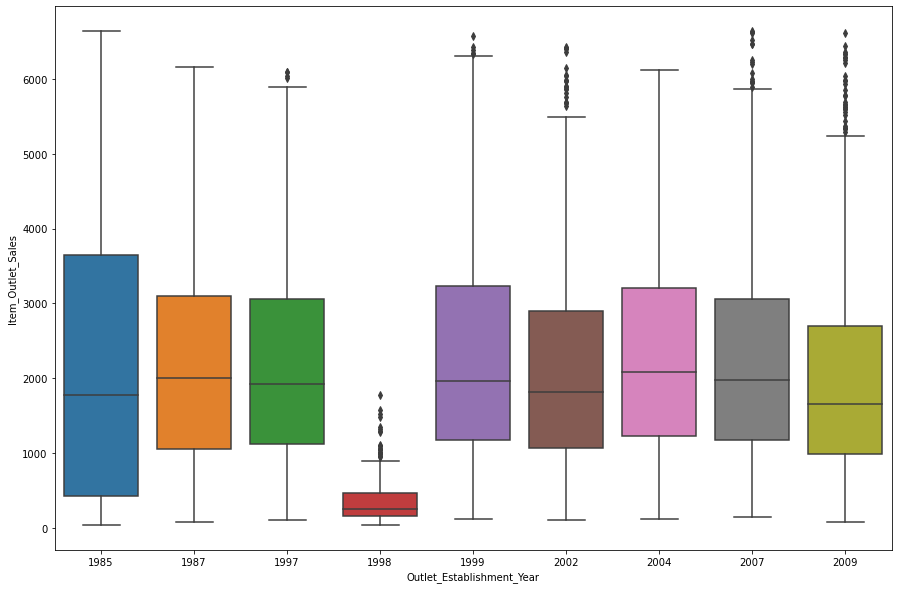

In [84]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

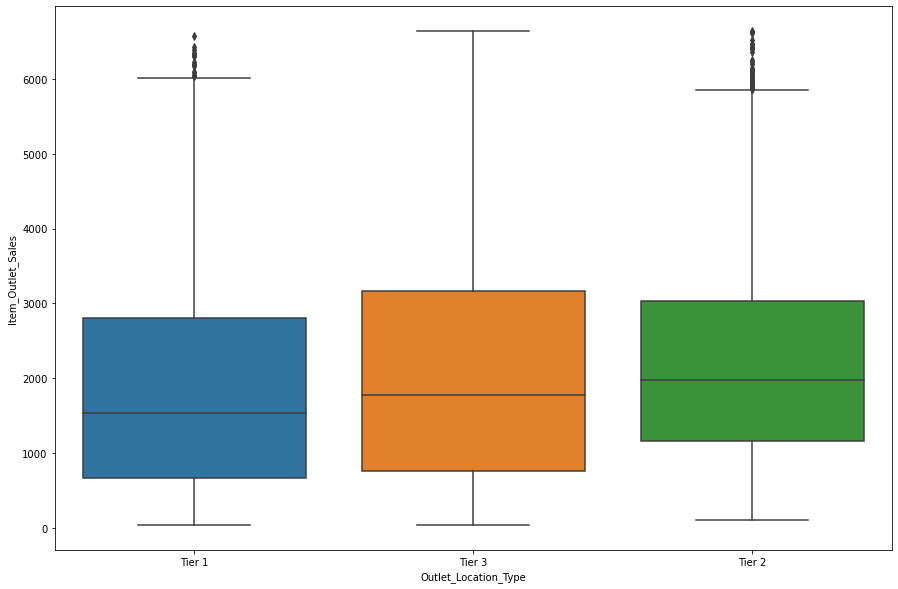

In [85]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)

In [86]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8507,FDN28,5.880,Regular,0.030242,Frozen Foods,101.7990,OUT035,2004,Small,Tier 2,Supermarket Type1,515.9950
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

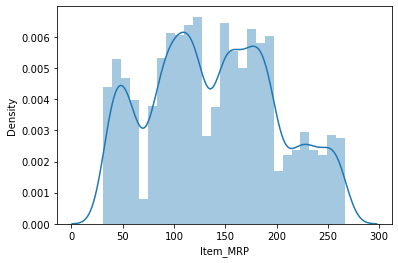

In [87]:
sns.distplot(df['Item_MRP'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

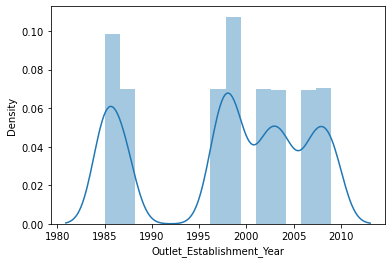

In [88]:
sns.distplot(df['Outlet_Establishment_Year'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

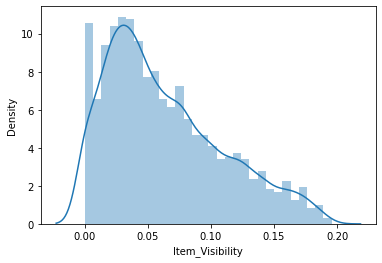

In [89]:
sns.distplot(df['Item_Visibility'])

In [90]:
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])


In [91]:
df=df[df['Item_Visibility']>0]


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

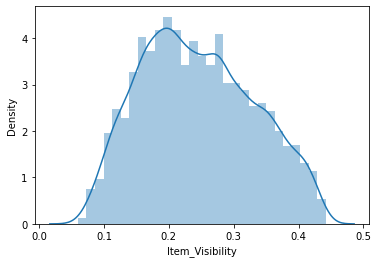

In [92]:
sns.distplot(df['Item_Visibility'])

In [93]:
le=LabelEncoder()


In [94]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_11656\645959185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])


In [95]:
df['Item_Type']=le.fit_transform(df['Item_Type'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_11656\1608934067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Type']=le.fit_transform(df['Item_Type'])


In [96]:
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_11656\2040216500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])


In [97]:
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])



C:\Users\himanshu\AppData\Local\Temp\ipykernel_11656\3503832270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])


In [98]:
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_11656\595231497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])


In [99]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,1,0.126678,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920000,2,0.138846,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500000,1,0.129461,10,141.6180,OUT049,1999,1,0,1,2097.2700
7,FDP10,12.857645,1,0.357029,13,107.7622,OUT027,1985,1,2,3,4022.7636
8,FDH17,16.200000,2,0.129179,5,96.9726,OUT045,2002,1,1,1,1076.5986
...,...,...,...,...,...,...,...,...,...,...,...,...
8507,FDN28,5.880000,2,0.173903,5,101.7990,OUT035,2004,2,1,1,515.9950
8513,FDH31,12.000000,2,0.142854,10,99.9042,OUT035,2004,2,1,1,595.2252
8517,FDF53,20.750000,4,0.289148,5,178.8318,OUT046,1997,2,0,1,3608.6360
8520,NCJ29,10.600000,1,0.187580,8,85.1224,OUT035,2004,2,1,1,1193.1136


In [100]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_11656\962698086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


In [101]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,1,0.126678,4,249.8092,1999,1,0,1,3735.1380
1,5.920000,2,0.138846,14,48.2692,2009,1,2,2,443.4228
2,17.500000,1,0.129461,10,141.6180,1999,1,0,1,2097.2700
7,12.857645,1,0.357029,13,107.7622,1985,1,2,3,4022.7636
8,16.200000,2,0.129179,5,96.9726,2002,1,1,1,1076.5986
...,...,...,...,...,...,...,...,...,...,...
8507,5.880000,2,0.173903,5,101.7990,2004,2,1,1,515.9950
8513,12.000000,2,0.142854,10,99.9042,2004,2,1,1,595.2252
8517,20.750000,4,0.289148,5,178.8318,1997,2,0,1,3608.6360
8520,10.600000,1,0.187580,8,85.1224,2004,2,1,1,1193.1136


In [102]:
y=df['Item_Outlet_Sales']

In [103]:
X=df.drop(['Item_Outlet_Sales'],axis=1)

In [104]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300000,1,0.126678,4,249.8092,1999,1,0,1
1,5.920000,2,0.138846,14,48.2692,2009,1,2,2
2,17.500000,1,0.129461,10,141.6180,1999,1,0,1
7,12.857645,1,0.357029,13,107.7622,1985,1,2,3
8,16.200000,2,0.129179,5,96.9726,2002,1,1,1
...,...,...,...,...,...,...,...,...,...
8507,5.880000,2,0.173903,5,101.7990,2004,2,1,1
8513,12.000000,2,0.142854,10,99.9042,2004,2,1,1
8517,20.750000,4,0.289148,5,178.8318,1997,2,0,1
8520,10.600000,1,0.187580,8,85.1224,2004,2,1,1


In [105]:
sc=StandardScaler()

In [106]:
X=sc.fit_transform(X) #Fit to data, then transform it.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Split arrays or matrices into random train and test subsets.

In [108]:
rfr=RandomForestRegressor()


In [109]:
rfr.fit(X_train,y_train) #training the model using X train and Y train 

RandomForestRegressor()

In [110]:
y_pred=rfr.predict(X_test)#predicting value of dependent feature based on independent feature 

In [111]:
y_pred

array([1067.736802, 2300.678558, 3018.364352, ..., 2852.640074,
       2047.907588, 2464.831548])

In [112]:
r2_score(y_test,y_pred)

0.5071711371838418

In [113]:
lr=LinearRegression()


In [114]:
lr.fit(X_train,y_train) #training the model using X train and Y train 

LinearRegression()

In [115]:
predict=lr.predict(X_test) #predicting value of dependent feature based on independent feature 


In [116]:
predict

array([1425.26158536, 2490.77064982, 2532.99919577, ..., 2544.67954587,
       2543.5877549 , 2012.18263663])

In [117]:
r2_score(y_test,predict) 
#r2_score method tells the amount of the variation in the predicted value and actual value

0.47132875932735296